In [148]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.tree import export_graphviz

import pandas as pd
import seaborn
import numpy
import matplotlib.pyplot as plt
import pydotplus

In [149]:
data = pd.read_csv('./train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<h5>Tạo tập dữ liệu để Train</h5>

In [150]:
Data_Train=data[['LotArea', 'YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd','SalePrice']]
Data_Train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,8450,2003,856,854,2,3,8,208500
1,9600,1976,1262,0,2,3,6,181500
2,11250,2001,920,866,2,3,6,223500
3,9550,1915,961,756,1,3,7,140000
4,14260,2000,1145,1053,2,4,9,250000


<h5>Kiểm Tra dữ liệu thiếu</h5>

In [151]:
Data_Train.isna().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

<h5>Thống kê dữ liệu</h5>

In [152]:
Data_Train.describe().round(2)

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,10516.83,1971.27,1162.63,346.99,1.57,2.87,6.52,180921.2
std,9981.26,30.20,386.59,436.53,0.55,0.82,1.63,79442.5
min,1300.00,1872.00,334.00,0.00,0.00,0.00,2.00,34900.0
25%,7553.50,1954.00,882.00,0.00,1.00,2.00,5.00,129975.0
50%,9478.50,1973.00,1087.00,0.00,2.00,3.00,6.00,163000.0
75%,11601.50,2000.00,1391.25,728.00,2.00,3.00,7.00,214000.0
max,215245.00,2010.00,4692.00,2065.00,3.00,8.00,14.00,755000.0


<h5>Outlier Check</h5>

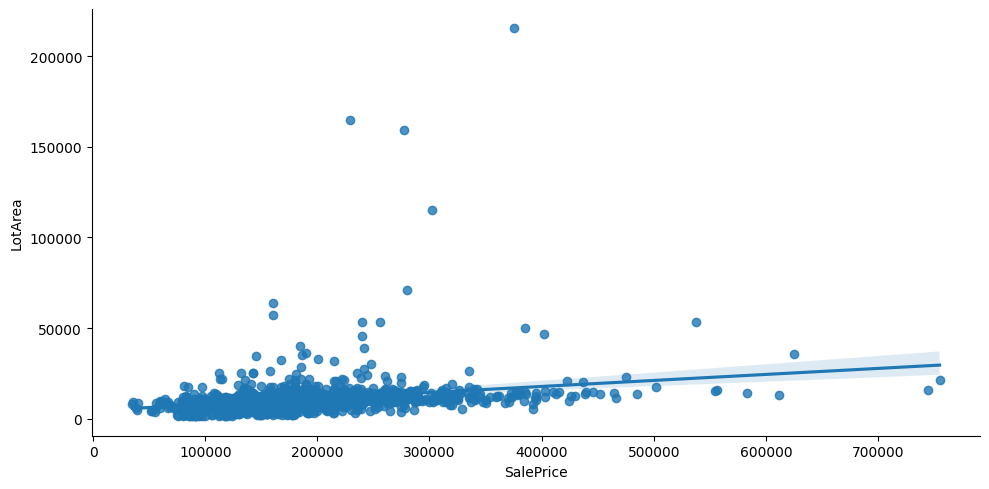

In [153]:
seaborn.lmplot(x = 'SalePrice', y = 'LotArea', data = Data_Train, aspect=2, height=5)
plt.show()

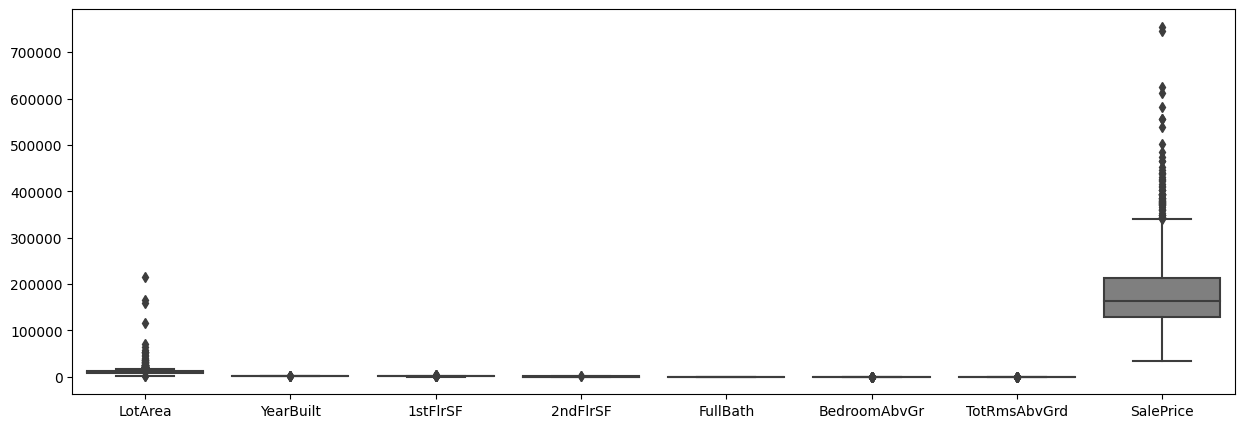

In [154]:
plt.figure(figsize=(15, 5))
seaborn.boxplot(Data_Train)
plt.show()

<p>Hàm find_outliers_IQR(data) được sử dụng để tìm các giá trị ngoại lệ trong tập dữ liệu data bằng phương pháp IQR (Interquartile Range).</p>
<p>- Khởi tạo giá trị Q1 (25%), Q3 (75%) và IQR (Interquartile Range). <br>
   - Tính giá trị Q1 bằng cách lấy phân vị 25% của dữ liệu data. <br>
   - Tính giá trị Q3 bằng cách lấy phân vị 75% của dữ liệu data. <br>
   - Tính giá trị IQR bằng cách lấy hiệu của Q3 và Q1. <br>
   - Tìm các giá trị ngoại lệ bằng cách xác định các giá trị trong data mà nhỏ hơn Q1 trừ đi 1.5 lần IQR hoặc lớn hơn Q3 cộng với 1.5 lần IQR. <br>
</p>

In [155]:
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers

<h5>Tìm Outlier cho SalePrice</h5>

In [156]:
sale_price_outliers = find_outliers_IQR(Data_Train['SalePrice'])
sale_price_outliers.count()

61

In [157]:
cut_labels = ['Low','Medium','High','Outliers']
cut_bins = [0,150000,300000,500000, Data_Train['SalePrice'].max()]
Data_Train_copy = Data_Train.copy()
Data_Train_copy['SalePriceLable'] = pd.cut(Data_Train_copy['SalePrice'], bins=cut_bins, labels=cut_labels)

In [158]:
Data_Train_copy

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice,SalePriceLable
0,8450,2003,856,854,2,3,8,208500,Medium
1,9600,1976,1262,0,2,3,6,181500,Medium
2,11250,2001,920,866,2,3,6,223500,Medium
3,9550,1915,961,756,1,3,7,140000,Low
4,14260,2000,1145,1053,2,4,9,250000,Medium
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7,175000,Medium
1456,13175,1978,2073,0,2,3,7,210000,Medium
1457,9042,1941,1188,1152,2,4,9,266500,Medium
1458,9717,1950,1078,0,1,2,5,142125,Low


In [159]:
print(Data_Train_copy['SalePriceLable'][(Data_Train_copy['SalePriceLable'] == 'Low')].count())
print(Data_Train_copy['SalePriceLable'][(Data_Train_copy['SalePriceLable'] == 'Medium')].count())
print(Data_Train_copy['SalePriceLable'][(Data_Train_copy['SalePriceLable'] == 'High')].count())
print(Data_Train_copy['SalePriceLable'][(Data_Train_copy['SalePriceLable'] == 'Outliers')].count())

619
726
106
9


<h5>Xây dựng mô hình</h5>


In [160]:
y = Data_Train_copy['SalePriceLable']
X = Data_Train_copy[["LotArea" ,"YearBuilt" ,"1stFlrSF" ,"2ndFlrSF" ,"FullBath" ,"BedroomAbvGr" ,"TotRmsAbvGrd"]]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [162]:
print('Số giá trị trong từng bộ dữ liệu')
print('X_train: ', numpy.shape(X_train))
print('y_train: ', numpy.shape(y_train))
print('X_test: ', numpy.shape(X_test))
print('y_test: ', numpy.shape(y_test))

Số giá trị trong từng bộ dữ liệu
X_train:  (1168, 7)
y_train:  (1168,)
X_test:  (292, 7)
y_test:  (292,)


In [163]:
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [164]:
predicts = model.predict(X_test)
print(predicts[:5])
print(y_test[:5])

['Medium' 'Low' 'Low' 'Low' 'Low']
258     Medium
267     Medium
288        Low
649        Low
1233       Low
Name: SalePriceLable, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Outliers']


<h5>Đánh giá mô hình</h5>

In [165]:
print(accuracy_score(y_test, predicts))
print(confusion_matrix(y_test, predicts))
print(classification_report(y_test, predicts))

0.8013698630136986
[[ 13   0   7   1]
 [  0 118  15   0]
 [  7  27 102   0]
 [  1   0   0   1]]
              precision    recall  f1-score   support

        High       0.62      0.62      0.62        21
         Low       0.81      0.89      0.85       133
      Medium       0.82      0.75      0.78       136
    Outliers       0.50      0.50      0.50         2

    accuracy                           0.80       292
   macro avg       0.69      0.69      0.69       292
weighted avg       0.80      0.80      0.80       292



<h5>So sanh kết quả với thực tế</h5>

In [166]:
SalePrice_test = pd.DataFrame(y_test)
SalePrice_test.reset_index(drop=True, inplace=True)
SalePrice_test.head()

,SalePriceLable
0,Medium
1,Medium
2,Low
3,Low
4,Low


In [167]:
SalePrice_predicted = pd.DataFrame(predicts, columns=['Predicted SalePrice'])
SalePrice_predicted.head()

,Predicted SalePrice
0,Medium
1,Low
2,Low
3,Low
4,Low


In [168]:
SalePrice_comparing = pd.concat([SalePrice_test, SalePrice_predicted], axis=1)
SalePrice_comparing

,SalePriceLable,Predicted SalePrice
0,Medium,Medium
1,Medium,Low
2,Low,Low
3,Low,Low
4,Low,Low
...,...,...
287,Low,Low
288,Medium,Medium
289,Low,Low
290,Low,Low


In [169]:
target=Data_Train_copy['SalePriceLable'].unique()
feature = ["LotArea" ,"YearBuilt" ,"1stFlrSF" ,"2ndFlrSF" ,"FullBath" ,"BedroomAbvGr" ,"TotRmsAbvGrd"]

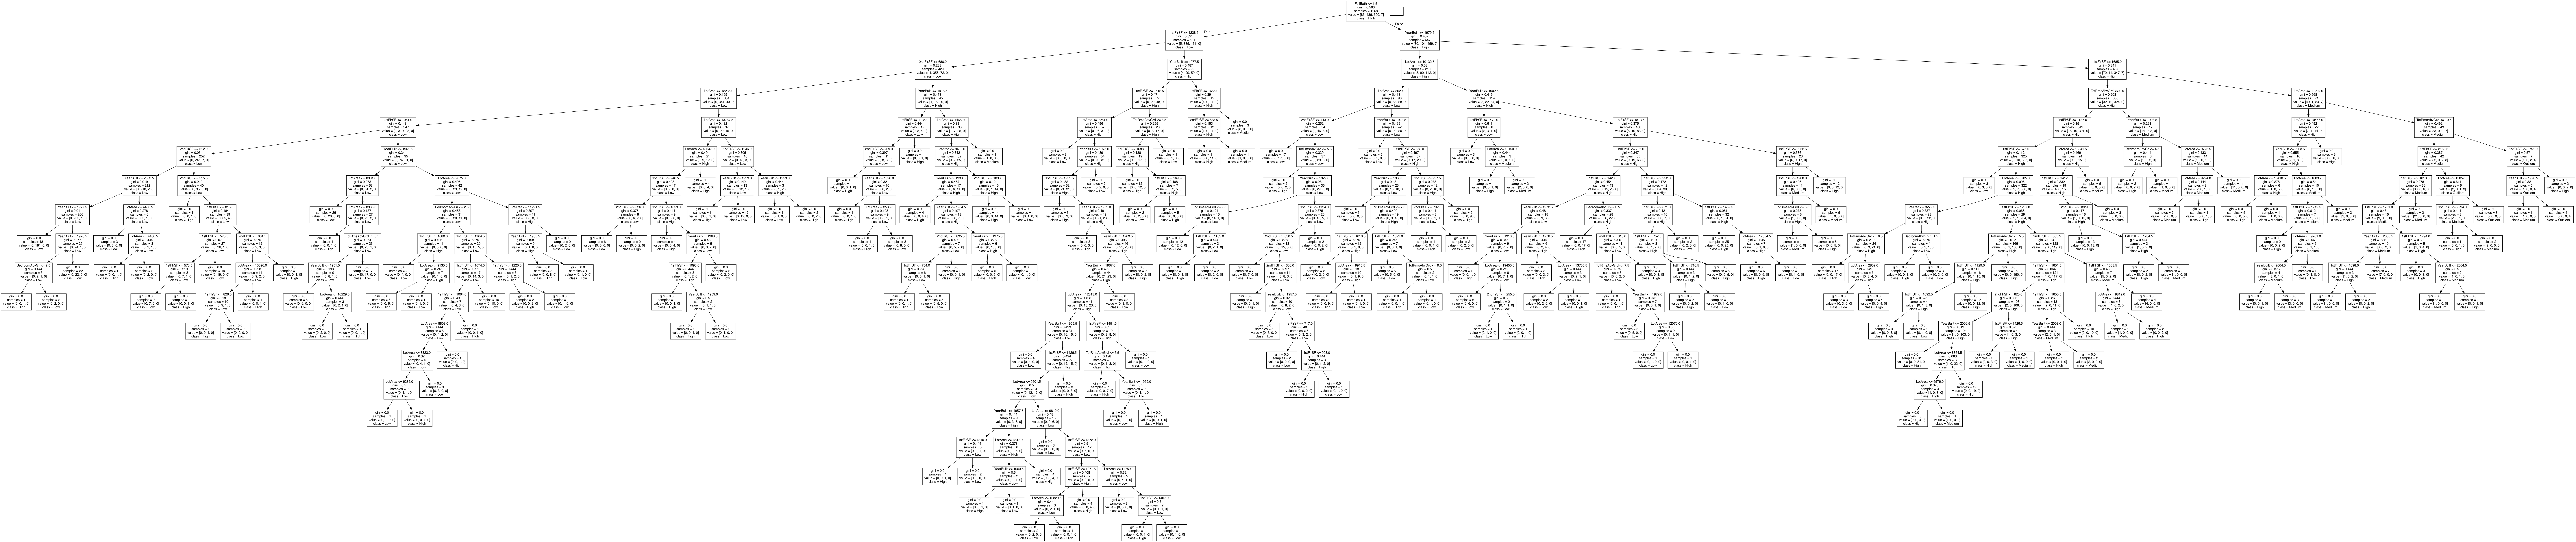

In [ ]:
dot_data = export_graphviz(model, out_file=None,feature_names=feature, class_names=target)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())